# Stat 350 Lab 9

## Due Tuesday, November 21 at 11:59 PM

In this lab, you will design a linear time-invariant filter that denoises a signal that has been corrupted by noise. Please refer to the notebook `Filter Design in Python.ipynb` from lecture. You should be able to transfer much of the code in that example to this lab.

**You are required to work on this lab with a partner. Only one member of each pair should submit the lab.**

**Please type your Cal Poly IDs (e.g., kjross) below. (Double click this cell to edit.)**

- Student 1 Cal Poly ID: 
- Student 2 Cal Poly ID:  

## You must first run the cell below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio
from scipy.io import wavfile
from io import BytesIO

## Part 1: Analyzing the Signal

The audio file (http://users.csc.calpoly.edu/~dsun09/stat350/labs/noisy.wav) contains a short music clip that has been contaminated by additive noise. Read the file into a Numpy array as follows.

```
audio = Audio(url="http://users.csc.calpoly.edu/~dsun09/stat350/labs/noisy.wav", embed=True)
fs, x = wavfile.read(BytesIO(audio.data))
```

**(a)** Plot the time-domain signal over the entire time range. Listen to the signal by having `audio` as the last line of the cell.

16000

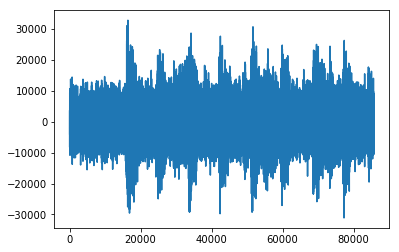

In [2]:
audio = Audio(url="http://users.csc.calpoly.edu/~dsun09/stat350/labs/noisy.wav", embed=True)
fs, x = wavfile.read(BytesIO(audio.data))
x_full = x
plt.plot(x)
fs

In [3]:
Audio(x, rate=fs)

**(b)** By listening to the audio and looking at your plot above, extract a segment of the signal `x` that contains only noise and no music. Plot its power spectrum.

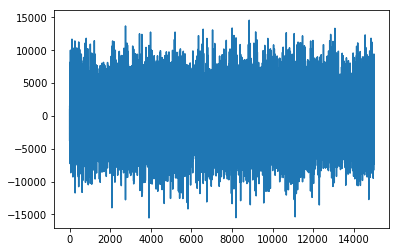

In [4]:
x_noise = x[1000:16000]
plt.plot(x_noise)

In [5]:
Audio(x_noise, rate=fs)

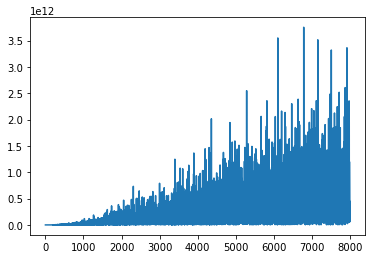

In [6]:
x = x_noise
x_hat = np.fft.fft(x_noise)
freqs = np.arange(0, fs, fs / len(x_noise))
inds = np.arange(len(x_noise) // 2)
plt.plot(freqs[inds], np.abs(x_hat[inds]) ** 2)

**(c)** Now extract a segment of the signal `x` that contains both noise and music. Plot its power spectrum.

(**Warning:** Don't select too long of a segment because the music, unlike the noise, is not stationary. In particular, the frequencies in the music will change over time. However, music is usually approximately stationary over windows of about 100 milliseconds.)

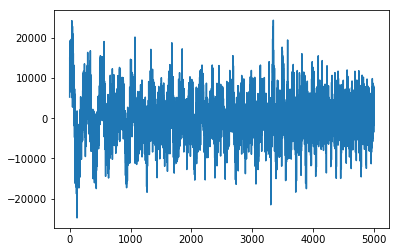

In [7]:
x_signal_plus_noise = x_full[70000:75000]
plt.plot(x_signal_plus_noise)

In [8]:
Audio(x_signal_plus_noise , rate=fs)

(0, 1000)

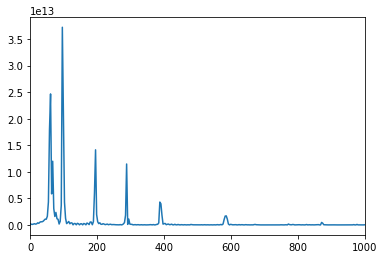

In [9]:
x = x_signal_plus_noise
x_hat = np.fft.fft(x_signal_plus_noise)
freqs = np.arange(0, fs, fs / len(x_signal_plus_noise))
inds = np.arange(len(x_signal_plus_noise) // 2)
plt.plot(freqs[inds], np.abs(x_hat[inds]) ** 2)
plt.xlim(0,1000)

## Part 2: Designing a Filter

**(a)** Based on your answers to 1(b) and 1(c) above, describe in words what you want the frequency response of your filter to look like, in order to remove as much noise as possible, while preserving the music.

**PLEASE TYPE YOUR EXPLANATION HERE.**

**(b)** Now create the frequency response you described above in code. Make sure the frequencies are in the appropriate order, with the positive frequencies coming before the negative frequencies.

(**Hint**: You may want to refer to the notebook "Filter Design in Python" that we went over in class for an example of how to do this.)

In [ ]:
f_cutoff = # FILL THIS IN

N = len(x)
f = np.arange(0, fs / 2, step=fs / N)
f_pos = np.arange(0, fs / 2, step=fs / N)
h_hat_pos = 1. * (f <= f_cutoff)
f_neg = np.arange(-fs / 2, 0, step=fs / N)
h_hat_neg = 1. * (f_neg >= -f_cutoff)
f = np.concatenate([f_pos, f_neg])
h_hat = np.concatenate([h_hat_pos, h_hat_neg])
plt.plot(f, h_hat)
plt.ylim(-0.1, 1.1)

**(c)** Take the inverse Fourier transform of the frequency response to obtain the impulse response. Truncate and rearrange the impulse response as appropriate. Store the final impulse response in a random variable `h_trunc` and plot it.

In [ ]:
h = np.real(np.fft.ifft(h_hat))
h_trunc = np.concatenate([h[-1000:], h[:1000]])
plt.plot(h_trunc)

## Part 3: Applying the Filter

Now that we have the impulse response, we can apply it to our signal by convolving our signal  with the impulse response.

**(a)** Apply the final impulse response `h_trunc` you obtained in 2(b) above to the noisy signal `x` to obtain the output signal. Store it in a variable `y` for later use. Plot the time-domain signal over the entire time range. If your filter worked, the noise at the beginning should be attenuated.

(**Hint**: Again, you may want to refer to the notebook "Filter Design in Python" for an example of how to do this.)

In [ ]:
x = x_full
y = np.convolve(x, h_trunc)
y = y[1:] # remove the first sample (since there are an odd number of samples)
N = len(y)
t = np.arange(0, N / fs, step=1. / fs)
plt.plot(t, y)
#plt.xlim(1, 1.05)

**(b)** Listen to the output signal `y` using the following code:

```
Audio(y, rate=fs)
```

If the output signal is too quiet or too loud, adjust the gain by multiplying `y` by a constant.

In [ ]:
Audio(50*y, rate=fs)

**(c)** Comment on how well your filter performed.

**PLEASE TYPE YOUR EXPLANATION HERE.**

## Submission Instructions

Before you submit this notebook, click the "Kernel" drop-down menu at the top of this page and select "Restart & Run All". This will ensure that all of the code in your notebook executes properly.

We will re-run your notebook before grading your answers. You will lose points for a notebook with cells that do not run, even if your answers are correct, so please do not skip this step.